In [1]:
import pandas as pd

dados_formados_path = 'input/dados_formados.csv'
dados_formados = pd.read_csv(dados_formados_path, delimiter=';')
dados_formados.columns

Index(['ID_ANONIMO', 'CR', 'PERIODO', 'INGRESSO', 'CODIGO', 'ANO', 'PERIODO.1',
       'NOTA', 'CH', 'SITUACAOALUNO'],
      dtype='object')

In [7]:
dados_formados = dados_formados.dropna(axis=0)
#dados_formados.head()
#dados_formados.CODIGO.describe()
veses_cursada = dados_formados.CODIGO.value_counts()
print(veses_cursada.to_string())

CODIGO
EL63B         380
IF62C         335
IF61B         333
IF65C         329
MA62A         329
EL68E         325
EL65H         323
MA61B         318
FI62A         313
IF61C         303
MA63A         302
IF63E         302
IF62J         299
FI61A         298
FI63A         296
MA65A         293
MA63B         292
EL65A         290
MA61A         289
ES61A         289
FI66A         285
EL65G         285
QB62A         279
IF63C         274
IF65E         270
IF64C         265
ES60A         264
FI64C         260
IF67D         259
EL66H         250
ES60F         249
IF66B         247
IF64J         247
QB70E         241
IF65D         241
EL66C         237
GE70H         230
GE60D         230
IF66D         229
ES60G         228
EL66D         228
EL68A         225
IF66J         222
EL64H         215
EL66G         214
GE60B         214
IF66C         208
IF67C         201
IF67B         200
IF68E         199
GE60C         197
IF68D         193
IF67H         189
MA72A         188
IF69D         187
GE7

In [8]:
from matplotlib import pyplot as plt

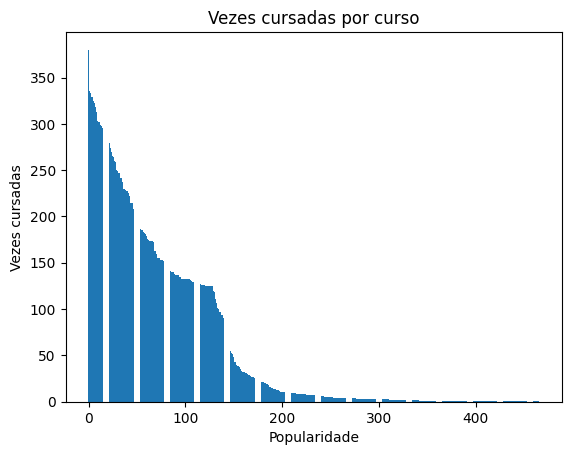

In [9]:
codigos = veses_cursada.keys()[:]
valores = veses_cursada.values[:]

plt.bar(range(len(codigos)),valores)
plt.title("Vezes cursadas por curso")
plt.ylabel("Vezes cursadas")
plt.xlabel("Popularidade")
#plt.xticks(range(len(codigos)),codigos)

plt.show()

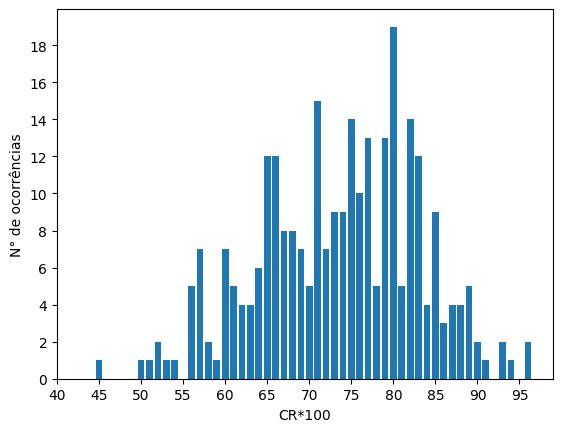

In [10]:
from collections import Counter
from math import floor
dados_cr = dados_formados.CR.unique()
histograma_cr = Counter(floor(float(cr.replace(",","."))*100) for cr in dados_cr)

plt.bar(histograma_cr.keys(), histograma_cr.values())
plt.xticks([i for i in range(40,100,5)])
plt.yticks([i for i in range(0,20,2)])
plt.xlabel("CR*100")
plt.ylabel("N° de ocorrências")
plt.show()

In [24]:
from typing import List

Vector = List[float]

def add(v: Vector, w: Vector) -> Vector:
    """Soma os elementos correspondentes"""
    assert len(v) == len(w), "Os vetores devem ter o mesmo tamanho"

    return [v_i + w_i for v_i, w_i in zip(v,w)]

assert add([1,2,3],[4,5,6]) == [5,7,9]

def subtract(v: Vector, w: Vector) -> Vector:
    """Subtrai os elementos correspondentes"""
    assert len(v) == len(w), "Os vetores devem ter o mesmo tamanho"

    return [v_i - w_i for v_i, w_i in zip(v,w)]
    
assert subtract([1,2,3],[4,5,6]) == [-3,-3,-3]

def vector_sum(vectors: List[Vector]) -> Vector:
    """Soma de vetores"""
    assert vectors, "Nenhum vetor foi encontrado"
    num_elements = len(vectors[0])
    assert all(len(v) == num_elements for v in vectors), "Erro de tamanho de vetor"
    return [sum(vector[i] for vector in vectors) for i in range(num_elements)]

assert vector_sum([[1,2],[3,4],[5,6],[7,8]]) == [16,20]

def scalar_multiply(c: float, v: Vector) -> Vector:
    """Multiplicacao escalar de um vetor"""
    return [c*v_i for v_i in v]

assert scalar_multiply(3, [1,2,3]) == [3,6,9]

def vector_mean(vectors: List[Vector]) -> Vector:
    """Calcula o vetor medio dos vetores de vectors"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

assert vector_mean([[1,2],[3,4],[5,6]]) == [3,4]

def dot(v: Vector, w: Vector) -> float:
    """Produto escalar dos vetores"""
    assert len(v) == len(w), "Os vetores devem ter o mesmo tamanho"

    return sum(v*w for v, w in zip(v,w))

assert dot([1,2,3],[4,5,6]) == 4+10+18

def sum_of_squares(v: Vector) -> float:
    """Retorna a soma dos quadrados dos elementos do vetor"""
    return dot(v,v)

assert sum_of_squares([1,2,3]) == 1 + 4 + 9

import math

def magnitude(v: Vector) -> float:
    """Calcula a magnitude de um vetor"""
    return math.sqrt(sum_of_squares(v))

assert magnitude([3,4]) == 5

def squared_distance(v: Vector, w: Vector) -> float:
    return sum_of_squares(subtract(v,w))

def distance(v: Vector, w: Vector) -> float:
    return math.sqrt(squared_distance(v,w))
    

In [29]:
from typing import Tuple

Matrix = List[List[float]]

def shape(A: Matrix) -> Tuple[int,int]:
    """Retorna (num_rows, num_cols)""" 
    num_rows = len(A)
    num_cols = len(A[0]) if A else 0
    return num_rows, num_cols

assert shape([[1,2,3],[4,5,6]]) == (2,3)

def get_row(A: Matrix, i: int) -> Vector:
    return A[i]

def get_col(A: Matrix, j: int) -> Vector:
    return [A_i[j] for A_i in A]

from typing import Callable

def make_matrix(num_rows: int, num_cols: int, entry_fn: Callable[[int,int], float]) -> Matrix:
    return [[entry_fn(i,j) for i in range(num_cols)] for j in range(num_rows)]

def identity_matrix(n: int) -> Matrix:
    return make_matrix(n, n, lambda i, j: 1 if i==j else 0)

assert identity_matrix(3) == [[1,0,0],[0,1,0],[0,0,1]]